<a href="https://colab.research.google.com/github/tlinhnguyen2308/ANN/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/flowers-recognition


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Chỉ chọn 5 loài hoa
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
image_size = 64

data = []
labels = []

# Load ảnh và gán nhãn
for i, flower in enumerate(flower_classes):
    folder = os.path.join(path, 'flowers', flower)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(flower_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(flower_classes), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2572 - loss: 3.7340 - val_accuracy: 0.3414 - val_loss: 1.4530
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3461 - loss: 1.5008 - val_accuracy: 0.4144 - val_loss: 1.3838
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3895 - loss: 1.4061 - val_accuracy: 0.4155 - val_loss: 1.3766
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3807 - loss: 1.4013 - val_accuracy: 0.4282 - val_loss: 1.3081
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3739 - loss: 1.3774 - val_accuracy: 0.4132 - val_loss: 1.3521
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3999 - loss: 1.3801 - val_accuracy: 0.4259 - val_loss: 1.2855
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3928 - loss: 1.3532 - val_accuracy: 0.4375 - val_loss: 1.2634
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3854 - loss: 1.3418 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


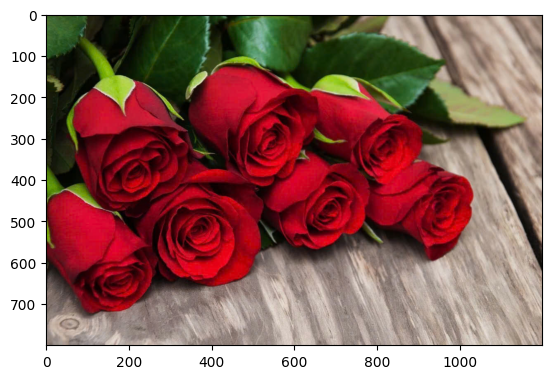

Predicted flower: rose


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(512, activation='relu', input_shape=(64 * 64 * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/hhhhh.jpg'
processed_image = preprocess_image(image_path)


predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(512, activation='relu', input_shape=(64 * 64 * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/hhhhh.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
flower_classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(f"Predicted flower: {flower_classes[predicted_class]}")

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyiamujo/human-palm-images")

print("Path to dataset files:", path)

100%|██████████| 924M/924M [00:31<00:00, 31.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/feyiamujo/human-palm-images/versions/1


In [6]:
import kagglehub
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tải dataset từ KaggleHub
path = kagglehub.dataset_download("feyiamujo/human-palm-images")
print("Path to dataset files:", path)

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy các lớp từ tên thư mục con
label_names = sorted(os.listdir(path))
print("Detected classes:", label_names)

# Load ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(path, label_name)
    if not os.path.isdir(folder):
        continue  # Bỏ qua nếu không phải thư mục

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Path to dataset files: /kaggle/input/human-palm-images
Detected classes: ['FEMALE', 'MALE']


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4953 - loss: 4.0293 - val_accuracy: 0.5000 - val_loss: 0.9166
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4718 - loss: 0.9853 - val_accuracy: 0.5000 - val_loss: 1.4218
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5189 - loss: 1.0170 - val_accuracy: 0.6438 - val_loss: 0.6277
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5825 - loss: 0.6726 - val_accuracy: 0.7250 - val_loss: 0.6143
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6766 - loss: 0.5984 - val_accuracy: 0.5188 - val_loss: 0.7416
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6247 - loss: 0.6524 - val_accuracy: 0.6250 - val_loss: 0.6222
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.6929 - loss: 0.5822 - val_accuracy: 0.6812 - val_loss: 0.5996
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6312 - loss: 0.6479 - val_accuracy: 0.6062 - val_loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


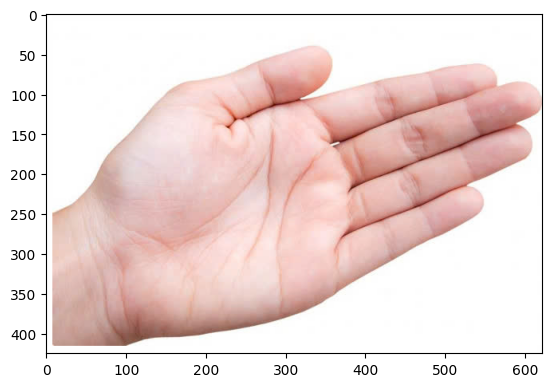

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6927 - loss: 0.5993
Predicted class: 0


In [10]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/tay.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vietnamese-currency


In [6]:
import kagglehub
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tải dataset từ KaggleHub
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")
print("Path to dataset files:", path)

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy các lớp từ tên thư mục con
label_names = sorted(os.listdir(os.path.join(path, 'dataset'))) # Correct the path to access the 'dataset' subfolder
print("Detected classes:", label_names)

# Load ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(path, 'dataset', label_name) # Correct the path to access image folders
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is None: # Check if image was loaded successfully
                print(f"Failed to load image: {img_path}")
                continue
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Path to dataset files: /kaggle/input/vietnamese-currency
Detected classes: ['000000', '000200', '000500', '001000', '002000', '005000', '010000', '020000', '050000', '100000', '200000', '500000', 'ngtrdaiDataset.data']


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.1009 - loss: 3.9012 - val_accuracy: 0.2210 - val_loss: 2.3413
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2823 - loss: 2.1728 - val_accuracy: 0.3315 - val_loss: 2.0935
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3362 - loss: 1.9420 - val_accuracy: 0.3149 - val_loss: 1.9428
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3875 - loss: 1.7678 - val_accuracy: 0.4309 - val_loss: 1.7275
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4621 - loss: 1.5767 - val_accuracy: 0.3738 - val_loss: 1.7775
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4859 - loss: 1.4643 - val_accuracy: 0.4494 - val_loss: 1.5739
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5460 - loss: 1.3398 - val_accuracy: 0.4917 - val_loss: 1.4741
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.5877 - loss: 1.2129 - val_accuracy: 0.5138 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


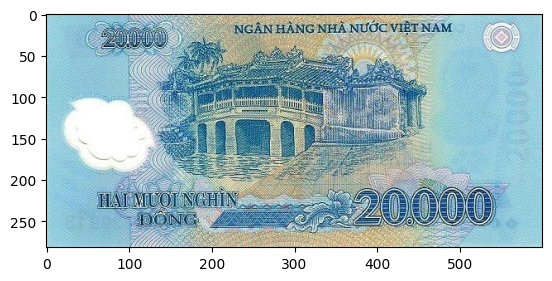

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5037 - loss: 1.4148
Predicted class: 8


In [8]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/20000.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)

In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vietnamese-foods-dataset


In [50]:
import kagglehub
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tải dataset
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")
path = os.path.join(path, "dataset")  # THÊM DÒNG NÀY

print("Dữ liệu nằm tại:", path)

# Danh sách món ăn muốn dùng (bạn có thể đổi tùy ý)
food_classes = ['banh_xeo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_khot']
image_size = 64

data = []
labels = []

# Load ảnh và gán nhãn
for i, food in enumerate(food_classes):
    folder = os.path.join(path, food)  # KHÔNG có 'foods'
    if not os.path.exists(folder):
        print(f" Không tìm thấy thư mục: {folder}")
        continue
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except Exception as e:
            print(f" Lỗi khi xử lý ảnh {filename}: {e}")
            continue

# Chuyển sang numpy array
data = np.array(data)
labels = to_categorical(labels, num_classes=len(food_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



Dữ liệu nằm tại: /kaggle/input/vietnamese-foods-dataset/dataset


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(food_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.2118 - loss: 5.5499 - val_accuracy: 0.2787 - val_loss: 1.5885
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.2242 - loss: 1.8686 - val_accuracy: 0.3484 - val_loss: 1.5467
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.2751 - loss: 1.5939 - val_accuracy: 0.3380 - val_loss: 1.5259
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3356 - loss: 1.5285 - val_accuracy: 0.4146 - val_loss: 1.4873
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.3775 - loss: 1.4780 - val_accuracy: 0.3624 - val_loss: 1.4768
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.3326 - loss: 1.4821 - val_accuracy: 0.3171 - val_loss: 1.5141
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.3118 - loss: 1.4933 - val_accuracy: 0.2892 - val_loss: 1.5465
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.3276 - loss: 1.5189 - val_accuracy: 0.3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


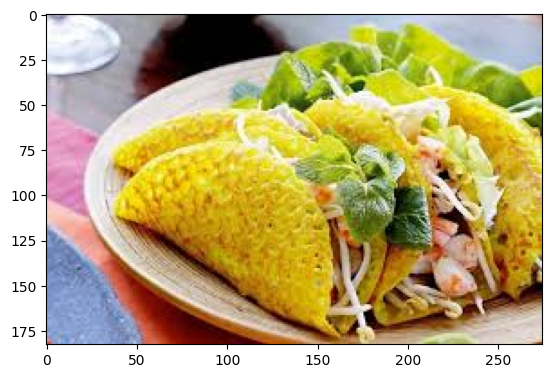

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2841 - loss: 1.5217
Predicted class: 1


In [53]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/bánh xèo.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
loss, acc = model.evaluate(X_test, y_test)
print('Predicted class:', predicted_class)